In [2]:
import numpy as np
import tensorflow as tf

Label:  3


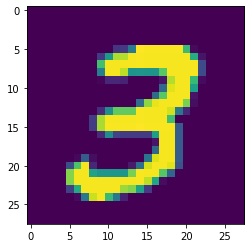

In [3]:
from keras.datasets import mnist

(X_train, trainlabels), (X_test, testlabels) = mnist.load_data()

import matplotlib.pyplot as plt

label = 7
plt.imshow(X_train[label])
print('Label: ', trainlabels[label])


In [4]:
X_train = X_train.reshape(X_train.shape[0],28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [5]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(trainlabels, num_classes = 10)
Y_test = to_categorical(testlabels, num_classes = 10)

test = np.where(trainlabels == 9)[0][0]
Y_train[test,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [29]:
# A general, but somewhat involved way of building a feedforward network

class myModel(tf.keras.Model):
    def __init__(self):
        super(myModel,self).__init__()
        self.hidden1 = tf.keras.layers.Dense(100,kernel_initializer='random_normal', kernel_regularizer=tf.keras.regularizers.L2(1e-3))
        self.activation1 = tf.keras.layers.ReLU()
        self.outputlayer = tf.keras.layers.Dense(10)
        
    def call(self, inputs):
        x = self.hidden1(inputs)
        x = self.activation1(x)
        x = self.outputlayer(x)
        return tf.keras.activations.softmax(x)

model = myModel()

In [7]:
dir(myModel)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_autographed_call',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_cast_single_input',
 '_check_call_args',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_compile_was_called',
 '_compute_dtype',
 '_configure_steps_per_execution',
 '_dedup_weights',
 '_deferred_dependencies',
 '_dtype',
 '_eager_losses',
 '_flatten',
 '_flatten_

In [35]:

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adagrad')
model.fit(X_train,
          Y_train,
          epochs = 10,
          batch_size=32)

model.summary()

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1662
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1498
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1444
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1406
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1381
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1360
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1343
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1328
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1315
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1303
Model: "my_model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)  

In [37]:
hardpred = model.predict(X_test).argmax(axis = 1)

print('Accuracy: ',np.sum(np.where(hardpred == testlabels, 1, 0))/10000)

Accuracy:  0.9618


In [8]:
# A less general, but simpler way to build feedforward networks

another = tf.keras.models.Sequential()
layer1 = another.add(tf.keras.layers.Dense(100, input_shape=(784,), activation='relu'))
#layer2 = another.add(tf.keras.layers.Dense(50, activation='relu'))
output_layer = another.add(tf.keras.layers.Dense(10, activation = 'linear'))
outputs = another.add(tf.keras.layers.Softmax())

another.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [15]:
another.compile(loss = 'categorical_crossentropy', optimizer = 'adagrad')

another.fit(X_train,Y_train, epochs=30, batch_size = 64)

Epoch 1/30
938/938 [==============================] - 1s 1ms/step - loss: 0.3871
Epoch 2/30
938/938 [==============================] - 1s 1ms/step - loss: 0.2653
Epoch 3/30
938/938 [==============================] - 1s 1ms/step - loss: 0.2321
Epoch 4/30
938/938 [==============================] - 1s 1ms/step - loss: 0.2111
Epoch 5/30
938/938 [==============================] - 1s 1ms/step - loss: 0.1963
Epoch 6/30
938/938 [==============================] - 1s 1ms/step - loss: 0.1834
Epoch 7/30
938/938 [==============================] - 1s 1ms/step - loss: 0.1725
Epoch 8/30
938/938 [==============================] - 1s 1ms/step - loss: 0.1636
Epoch 9/30
938/938 [==============================] - 1s 1ms/step - loss: 0.1555
Epoch 10/30
938/938 [==============================] - 1s 1ms/step - loss: 0.1486
Epoch 11/30
938/938 [==============================] - 1s 1ms/step - loss: 0.1420
Epoch 12/30
938/938 [==============================] - 1s 1ms/step - loss: 0.1359
Epoch 13/30
938/938 [====

In [16]:
Y_pred = another.predict(X_test).argmax(axis = 1)
print('Accuracy: ', np.sum(np.where(Y_pred == testlabels, 1, 0))/10000)

Accuracy:  0.9421
